<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/histograms_boxplots_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograms & Boxplots Exercise  (Core)
- Lisa Broadhead
- June 6, 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/coding_dojo/files/catsvdogs.xlsx"
df = pd.read_excel(file)

In [ ]:
df.head(50)

### Clean up needed?

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     int64  
 2   Percentage of households with pets  49 non-null     float64
 3   Number of Pet Households (in 1000)  49 non-null     int64  
 4   Percentage of Dog Owners            49 non-null     float64
 5   Dog Owning Households (1000s)       49 non-null     int64  
 6   Mean Number of Dogs per household   49 non-null     float64
 7   Dog Population (in 1000)            49 non-null     int64  
 8   Percentage of Cat Owners            49 non-null     float64
 9   Cat Owning Households               49 non-null     int64  
 10  Mean Number of Cats                 49 non-null     float64
 11  Cat Population                      49 non-null

In [ ]:
df.nunique()

Location                              49
Number of Households (in 1000)        49
Percentage of households with pets    43
Number of Pet Households (in 1000)    48
Percentage of Dog Owners              43
Dog Owning Households (1000s)         49
Mean Number of Dogs per household     10
Dog Population (in 1000)              49
Percentage of Cat Owners              42
Cat Owning Households                 49
Mean Number of Cats                   10
Cat Population                        49
dtype: int64

## 1. Plot a histogram of the Percentage of Dog Owners.

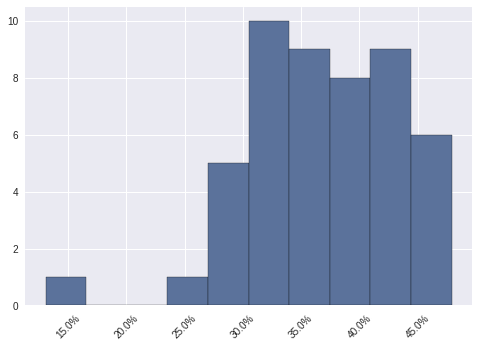

In [ ]:
plt.style.use('seaborn')
dog = df.loc[:, 'Percentage of Dog Owners'] <= 50
df.loc[dog,'Percentage of Dog Owners'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

## 2. Plot a histogram of the Percentage of Cat Owners.

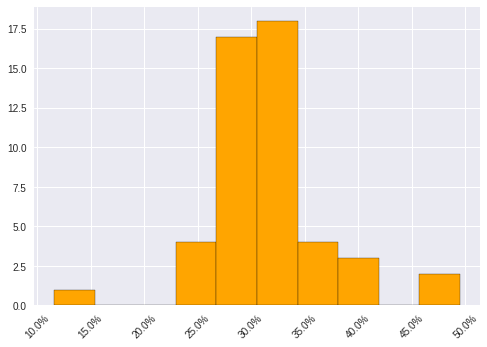

In [ ]:
cat = df.loc[:,"Percentage of Cat Owners"] <= 50
df.loc[cat,'Percentage of Cat Owners'].hist(bins=10,edgecolor='black', facecolor="orange")
plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

## 3a. What can we see by comparing these two histograms? What information does this tell us?

- Where there are less cat owners there are less dog owners
- Higher percentage of dog owners 
- Both don't have values around 20%


## 3b. Optional/Bonus: plot these two histograms on the same plot.

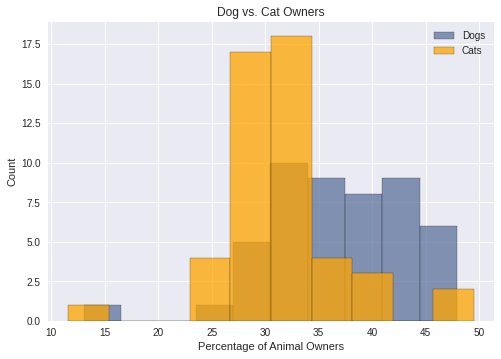

In [ ]:
fig, ax = plt.subplots()
df.loc[dog,'Percentage of Dog Owners'].hist(bins=10,edgecolor='black', color= '#5B729B', alpha = 0.75,)
df.loc[cat,'Percentage of Cat Owners'].hist(bins=10,edgecolor='black', alpha = 0.75, FaceColor="orange")
ax.set_title("Dog vs. Cat Owners")
ax.set_xlabel('Percentage of Animal Owners')
ax.set_ylabel('Count')
plt.legend(["Dogs","Cats"])

## 4. Create two boxplots on the same plot: one of the mean number of cats per household and the other of the mean number of dogs. An example of what this might look like is given below:

In [ ]:
df.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


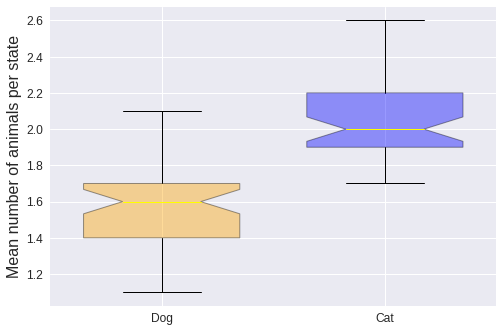

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
dog_owner = df['Mean Number of Dogs per household']
cat_owner = df['Mean Number of Cats']
boxplots = axs.boxplot([dog_owner,cat_owner], 
            notch = True, 
            labels=['Dog', 'Cat'],
            widths = .7,
            patch_artist=True,
            medianprops = dict(color='Yellow'),
            boxprops = dict(color='Black', facecolor = 'blue', alpha = .4));

plt.ylabel('Mean number of animals per state', fontsize = 16);
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange')
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

## 5. What can we see by comparing these two boxplots? What information does this tell us?

- on average it looks like there's more cats than dongs
- so that makes me think that the average cat owern has more than one cat as apposed to dog owners
- According to ournotched block plot there's 95% average of cat owners having 2 cats, and dog owners to have 1.6 dogs (so one in every three has 2 because 2+2+1 / 6 = 1.66)- so you could say 66% of people who have dogs have an average of 2 dogs!